In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_parquet("../../data/data_zvuk/zvuk.real_duration.parquet")

In [6]:
df.head()

,user_id,session_id,datetime,track_id,play_duration
0,1938823,2200336,2023-03-18 11:43:57.856,1242546,23.999992
1,1938823,2200336,2023-03-18 11:43:58.114,145031,2.000000
2,1938823,2200336,2023-03-18 11:45:12.932,145031,34.000000
3,1938823,2200336,2023-03-18 11:45:27.808,1501837,18.000000
4,1938823,2200336,2023-03-18 11:45:42.891,1402020,2.000000


In [7]:
df.sort_values("datetime", ignore_index=True)

,user_id,session_id,datetime,track_id,play_duration
0,6486258,3524541,2023-01-15 00:00:00.074,1064749,201.000000
1,5491677,4094387,2023-01-15 00:00:00.084,1224941,172.000000
2,6808990,7143886,2023-01-15 00:00:00.107,243163,199.000000
3,1586491,3406957,2023-01-15 00:00:00.468,41338,216.000000
4,7515726,4868792,2023-01-15 00:00:00.607,1097153,110.000000
...,...,...,...,...,...
244673546,7994202,10935073,2023-05-14 20:59:59.089,444873,93.000000
244673547,5028900,4602971,2023-05-14 20:59:59.735,493125,13.999992
244673548,8056611,1469042,2023-05-14 20:59:59.942,974941,2.999992
244673549,8056611,1469042,2023-05-14 20:59:59.988,974941,-1.000008


In [8]:
df[["user_id", "session_id", "track_id"]].nunique()

user_id         382790
session_id    12598314
track_id       1506950
dtype: int64

In [25]:
df = df[df.play_duration > 60]

In [26]:
df[["user_id", "session_id", "track_id"]].nunique()

user_id         350781
session_id    11086760
track_id       1220940
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128229767 entries, 16 to 244673550
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   user_id               int32         
 1   session_id            int32         
 2   datetime              datetime64[ns]
 3   track_id              int32         
 4   play_duration         float32       
 5   scaled_play_duration  float32       
dtypes: datetime64[ns](1), float32(2), int32(3)
memory usage: 4.3 GB


In [28]:
df["play_duration"].describe()

count    1.282298e+08
mean     1.846051e+02
std      6.228223e+01
min      6.100000e+01
25%      1.430000e+02
50%      1.840000e+02
75%      2.220000e+02
max      3.500000e+02
Name: play_duration, dtype: float64

<Axes: xlabel='play_duration', ylabel='Count'>

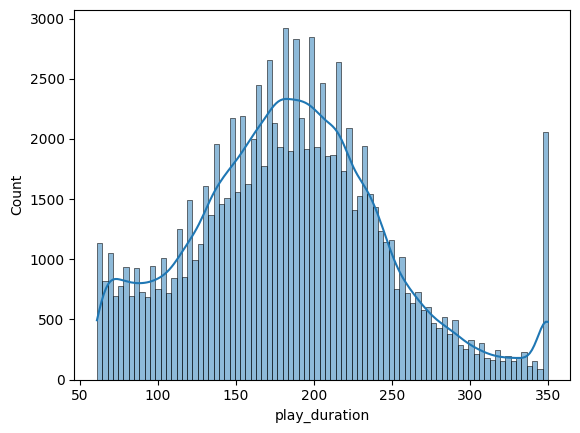

In [29]:
to_plot = df["play_duration"].sample(100000)
sns.histplot(to_plot, kde=True)

In [30]:
x_min = df["play_duration"].min()
x_max = df["play_duration"].max()
df["scaled_play_duration"] = (df["play_duration"] - x_min) / (x_max - x_min)
df["scaled_play_duration"] *= 5

In [31]:
df["scaled_play_duration"].describe()

count    1.282298e+08
mean     2.138491e+00
std      1.077547e+00
min      0.000000e+00
25%      1.418685e+00
50%      2.128028e+00
75%      2.785467e+00
max      5.000000e+00
Name: scaled_play_duration, dtype: float64

<Axes: xlabel='scaled_play_duration', ylabel='Count'>

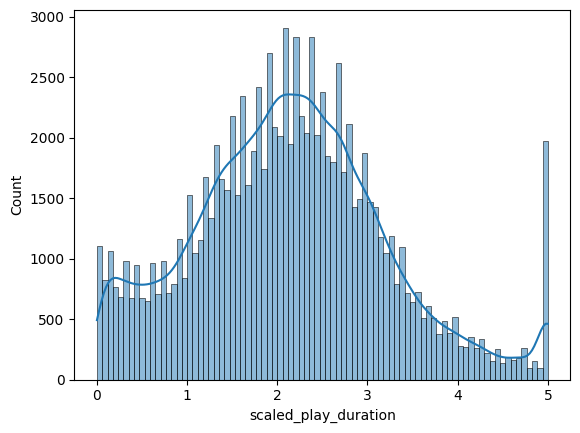

In [32]:
to_plot = df["scaled_play_duration"].sample(100000)
sns.histplot(to_plot, kde=True)

In [33]:
df.head()

,user_id,session_id,datetime,track_id,play_duration,scaled_play_duration
16,4669961,2070579,2023-02-15 01:15:07.362,1024676,334.0,4.723184
17,4669961,2070579,2023-02-15 01:15:07.367,1353716,142.0,1.401384
18,4669961,2070579,2023-02-15 01:15:07.371,667979,203.0,2.456748
19,4669961,2070579,2023-02-15 01:15:07.374,554027,229.0,2.906574
20,4669961,2070579,2023-02-15 01:15:07.377,305326,134.0,1.262976


In [34]:
df.drop(columns=["session_id", "play_duration"], inplace=True)

In [35]:
df["repeats"] = df.groupby(["user_id", "track_id"])["datetime"].transform("count")
df.drop_duplicates(["user_id", "track_id"], inplace=True, keep="last")

In [36]:
df.groupby("track_id").count().quantile(np.arange(.6, .7, .01))

,user_id,datetime,scaled_play_duration,repeats
0.60,4.0,4.0,4.0,4.0
0.61,4.0,4.0,4.0,4.0
0.62,4.0,4.0,4.0,4.0
0.63,5.0,5.0,5.0,5.0
0.64,5.0,5.0,5.0,5.0
0.65,5.0,5.0,5.0,5.0
0.66,5.0,5.0,5.0,5.0
0.67,6.0,6.0,6.0,6.0
0.68,6.0,6.0,6.0,6.0
0.69,6.0,6.0,6.0,6.0


In [37]:
df["repeats"].quantile(np.arange(.9, 1., .01))

0.90     5.0
0.91     5.0
0.92     6.0
0.93     7.0
0.94     8.0
0.95     9.0
0.96    11.0
0.97    13.0
0.98    17.0
0.99    26.0
Name: repeats, dtype: float64

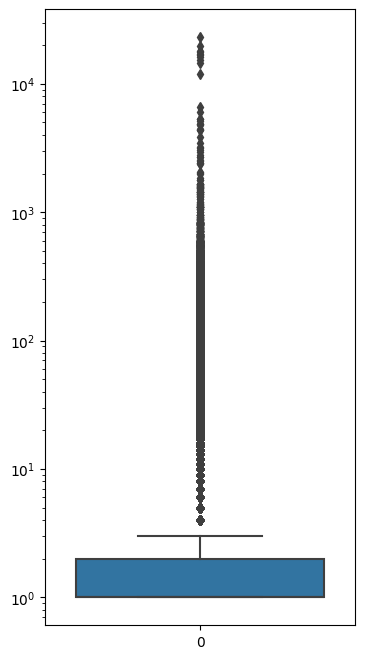

In [38]:
plt.figure(figsize=(4, 8), dpi=100)
sns.boxplot(df["repeats"].values)
plt.yscale("log")

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
user_lens = df.groupby("user_id")["track_id"].count()
item_lens = df.groupby("track_id")["user_id"].count()

user_lens.describe(), item_lens.describe()

(count    350781.000000
 mean        136.982556
 std         249.511374
 min           1.000000
 25%          12.000000
 50%          51.000000
 75%         156.000000
 max       10772.000000
 Name: track_id, dtype: float64,
 count    1.220940e+06
 mean     3.935564e+01
 std      3.994727e+02
 min      1.000000e+00
 25%      1.000000e+00
 50%      3.000000e+00
 75%      9.000000e+00
 max      6.799600e+04
 Name: user_id, dtype: float64)

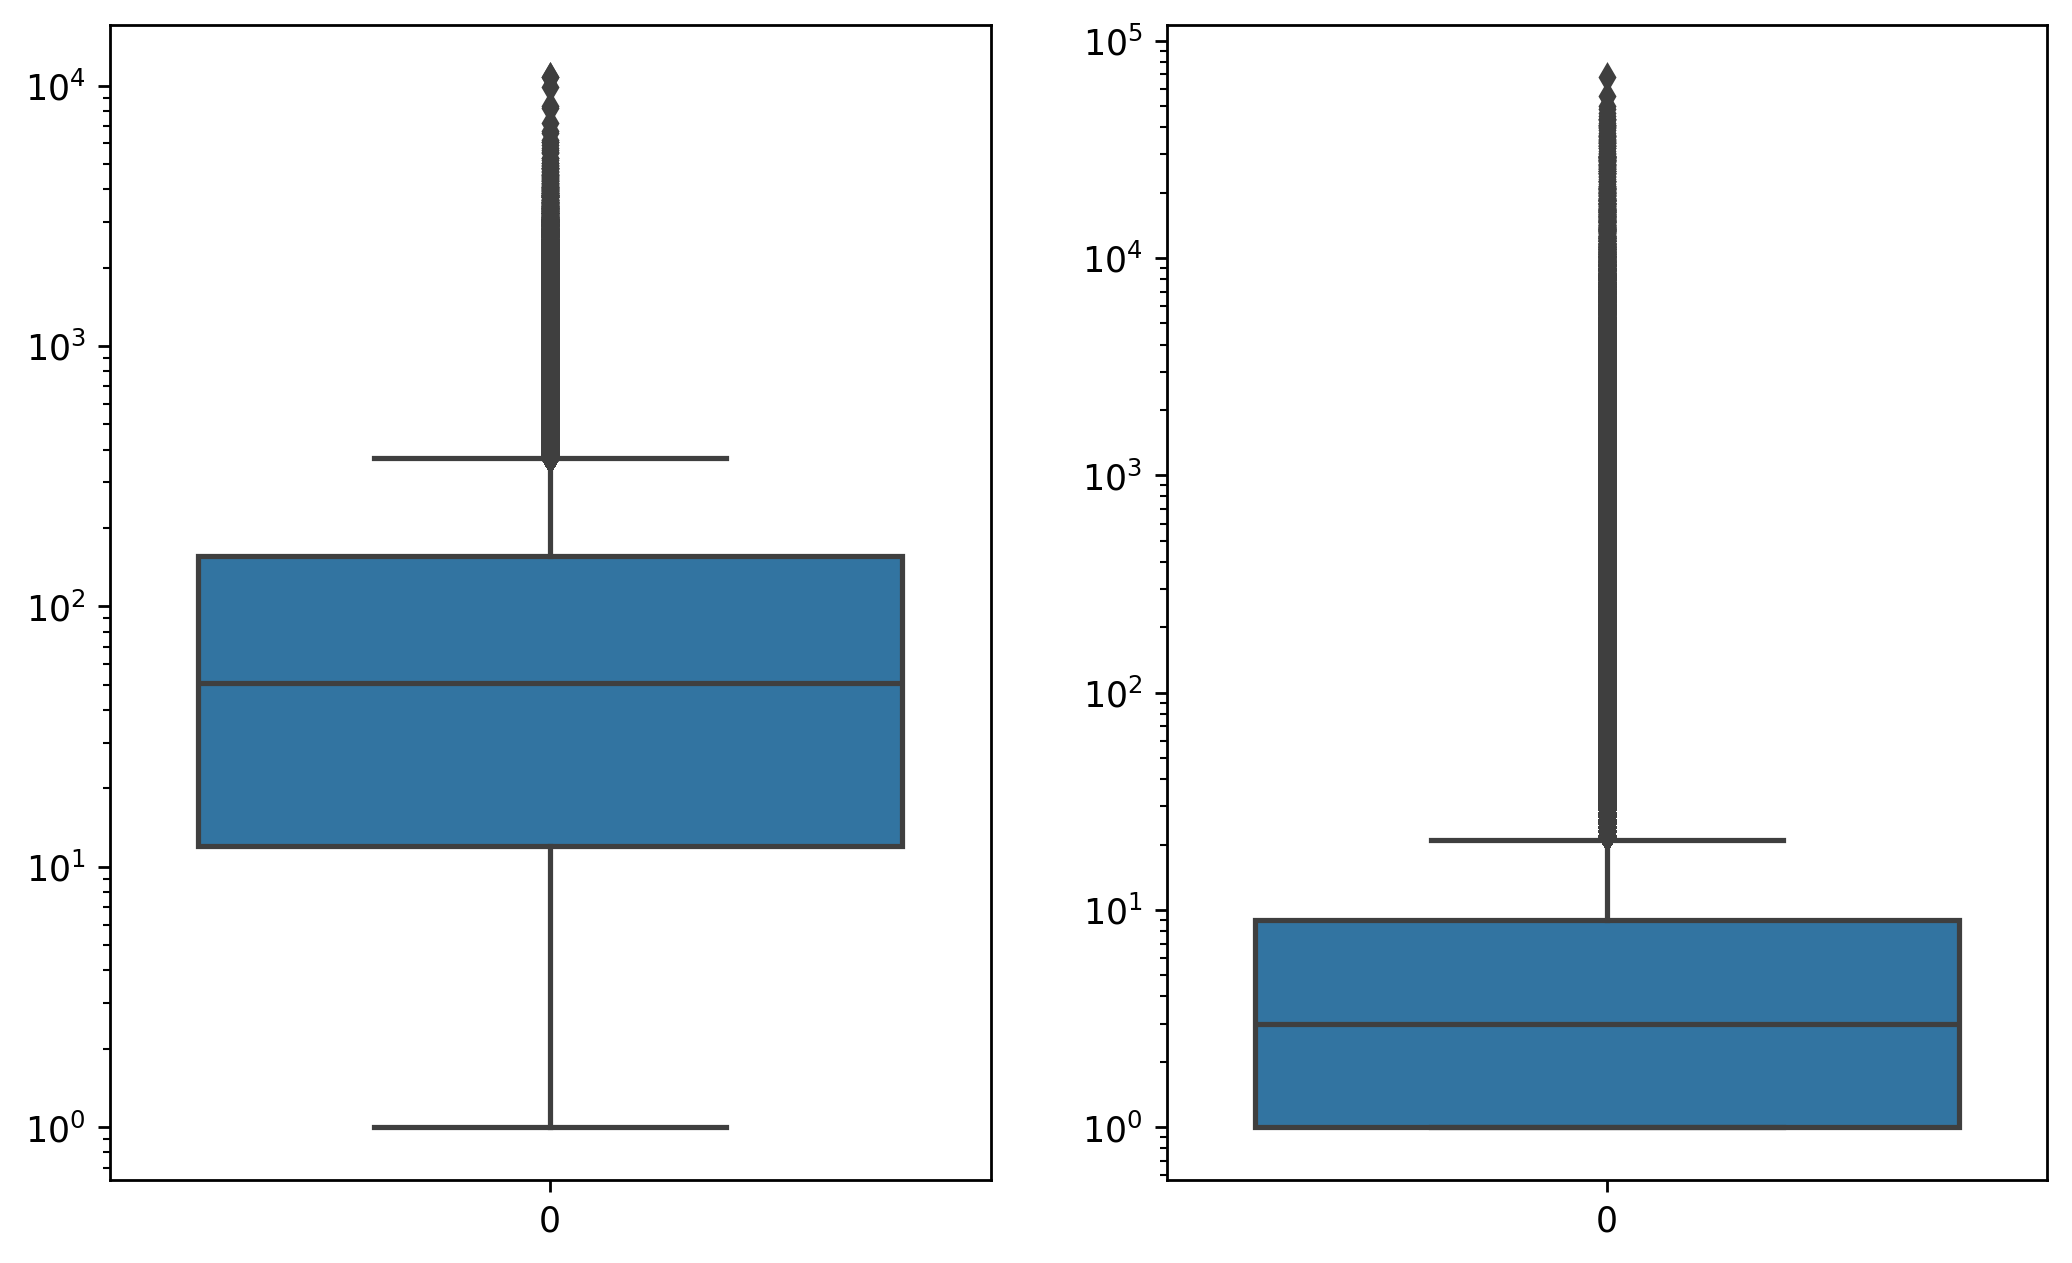

In [41]:
plt.figure(figsize=(10, 6), dpi=250)
plt.subplot(1, 2, 1)
sns.boxplot(user_lens.values)
plt.yscale("log")
plt.subplot(1, 2, 2)
sns.boxplot(item_lens.values);
plt.yscale("log")